# Cat vs Dog Classifier

### Importing libraries:

In [2]:
from PIL import Image
from matplotlib import image
from matplotlib import pyplot as plt


import pickle
import os

import numpy as np
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers.core import Dense, Flatten#, Dropout

from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical


### Screening through for data:

```python
import glob
train_data_dir, final_test_data_dir = 'data/train/', 'data/test1/'
def resize(*root_dirs):
    for root_dir in root_dirs:
        for filename in glob.iglob(root_dir + '*.jpg', recursive=True):
            print(filename)
            im = Image.open(filename)
            imResize = im.resize((64, 64), Image.ANTIALIAS)
            imResize.save(filename , 'JPEG', quality=90)
        
resize(train_data_dir, final_test_data_dir)
```

### Importing data:

In [3]:
def load_data(train_data_dir = None, final_test_data_dir = None, get_XY = False):
    
    if(get_XY):
        try:
            try: 
                infile = open('X','rb')
                X = pickle.load(infile)
                infile.close()
                print('Loaded X from pickle')
            except:
                print('No pickle for X found')

            try: 
                infile = open('Y','rb')
                Y = pickle.load(infile)
                infile.close()
                print('Loaded Y from pickle')
            except:
                print('No pickle for Y found')

            return X, Y
        except:
            print('X, Y pickle not found.')


    try:
        infile = open('train_data','rb')
        train_data = pickle.load(infile)
        infile.close()
        print('Loaded train_data from pickle')

    except:
        print('No pickle for train_data found')

        try:
            train_data = []

            for image_name in os.listdir(train_data_dir):
#                 image_name is the classification here
                image_data = image.imread(train_data_dir + image_name)
                train_data.append([1 if image_name[:3] == 'cat' else 0, image_data])

            print('Loaded train_data from dir')
            train_data = np.array(train_data)

        except:
            print('error in reading train_data_dir')

    try:
        infile = open('final_test_data','rb')
        final_test_data = pickle.load(infile)
        infile.close()

        print('Loaded final_test_data from pickle')
    except:
        print('No pickle for final_test_data found')

        try:
            final_test_data = []

            for image_name in os.listdir(final_test_data_dir):
#                 image_name is the id here, NOT the key
                image_data = image.imread(final_test_data_dir + image_name)
                final_test_data.append([image_name, image_data])

            print('Loaded final_test_data from dir')
            final_test_data = np.array(final_test_data)

        except:
            print('error in reading final_test_data')

    return train_data, final_test_data

In [4]:
train_data_dir, final_test_data_dir = 'data/train/', 'data/test1/'
try: 
    X, y = load_data(get_XY=True)
except:
    train_data, final_test_data = load_data(train_data_dir=train_data_dir,
                                        final_test_data_dir=final_test_data_dir,
                                        get_XY=False)

Loaded X from pickle
Loaded Y from pickle


In [5]:
train_data, final_test_data = load_data(train_data_dir=train_data_dir,
                                        final_test_data_dir=final_test_data_dir,
                                        get_XY=False)

Loaded train_data from pickle
Loaded final_test_data from pickle


```python
def save_data_in_pickle(**kwargs):
    for key, val in kwargs.items():
        outfile = open(key,'wb')
        pickle.dump(val,outfile)
        outfile.close()
try:
    save_data_in_pickle(X=X, Y=y)
except:
    save_data_in_pickle(train_data = train_data, final_test_data = final_test_data)
```

AxesImage(54,36;334.8x217.44) 
class = 1, dimensions = (64, 64, 3), length = 25000, 
In class index for dog = 0, cat = 1


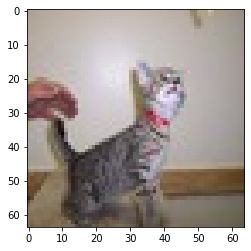

In [6]:
sample = 0
print(plt.imshow(train_data[sample][1]), 
      '\nclass = ' + str(train_data[sample][0]) + ',',
      'dimensions = ' + str(train_data[sample][1].shape) + ',',
      'length = ' + str(len(train_data)) + ',',
      '\nIn class index for dog = 0, cat = 1')

In [73]:
train_data.shape

(25000, 2)

### Test set has no lables hence using the training set more effectivly

If loaded from X, Y
```python
X, Y = train_data, final_test_data

print(X.shape, Y.shape)

```

If loaded from train/test data

```python
X = np.zeros([25000, 64, 64, 3])
Y = np.zeros([25000, 2])

for i in range(len(train_data)):
    X[i, :, :, :] = train_data[i][1]
    Y[i, :] = train_data[i][0]

print(X.shape, Y.shape)
```

In [ ]:
X = np.zeros([25000, 64, 64, 3])
y = np.zeros([25000, 1])

for i in range(len(train_data)):
    X[i, :, :, :] = train_data[i][1]
    y[i, :] = train_data[i][0]

X = X/256
y = to_categorical(y)

print(X.shape, y.shape)

Save the pickle

```python
save_data_in_pickle(X=X, Y=y)
```

In [9]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
X_train_orig.shape, X_test_orig.shape, y_train_orig.shape, y_test_orig.shape

((20000, 64, 64, 3), (5000, 64, 64, 3), (20000, 2), (5000, 2))

### Sampling data:

[0. 1.]


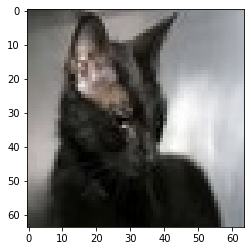

In [11]:
plt.imshow(X_train_orig[0])
print(y_train_orig[0])

[1. 0.]


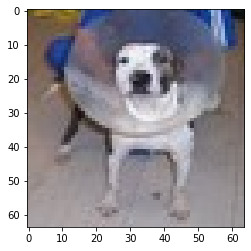

In [12]:
plt.imshow(X_train_orig[1])
print(y_train_orig[1])

[1. 0.]


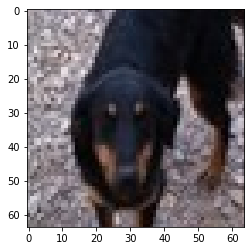

In [13]:
plt.imshow(X_train_orig[2])
print(y_train_orig[2])

### Making a model

In [14]:
X_train = X_train_orig
y_train = y_train_orig
X_test = X_test_orig
y_test = y_test_orig

In [18]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(64,64,3), padding='same'))
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [19]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 490s 24ms/step - loss: 0.6611 - accuracy: 0.5988 - val_loss: 0.6268 - val_accuracy: 0.6752
Epoch 2/10
20000/20000 [==============================] - 484s 24ms/step - loss: 0.5997 - accuracy: 0.6786 - val_loss: 0.5723 - val_accuracy: 0.7066
Epoch 3/10
20000/20000 [==============================] - 485s 24ms/step - loss: 0.5447 - accuracy: 0.7243 - val_loss: 0.5463 - val_accuracy: 0.7220
Epoch 4/10
20000/20000 [==============================] - 484s 24ms/step - loss: 0.4861 - accuracy: 0.7645 - val_loss: 0.4771 - val_accuracy: 0.7738
Epoch 5/10
20000/20000 [==============================] - 484s 24ms/step - loss: 0.4436 - accuracy: 0.7940 - val_loss: 0.4484 - val_accuracy: 0.7788
Epoch 6/10
20000/20000 [==============================] - 484s 24ms/step - loss: 0.4049 - accuracy: 0.8160 - val_loss: 0.4048 - val_accuracy: 0.8128
Epoch 7/10
20000/20000 [==============================] -

In [31]:
model.predict_classes(X_test[:5]), np.argmax(y_test[0:5], axis=1)

(array([0, 1, 0, 0, 0]), array([0, 1, 0, 0, 0]))

### Making another model:

In [21]:
model1 = Sequential()

#add model1 layers
model1.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model1.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model1.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(2, activation='softmax'))

In [22]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 109s 5ms/step - loss: 0.6601 - accuracy: 0.5825 - val_loss: 0.6302 - val_accuracy: 0.6522
Epoch 2/10
20000/20000 [==============================] - 109s 5ms/step - loss: 0.5627 - accuracy: 0.7135 - val_loss: 0.5325 - val_accuracy: 0.7284
Epoch 3/10
20000/20000 [==============================] - 109s 5ms/step - loss: 0.5040 - accuracy: 0.7527 - val_loss: 0.4972 - val_accuracy: 0.7562
Epoch 4/10
20000/20000 [==============================] - 110s 5ms/step - loss: 0.4576 - accuracy: 0.7853 - val_loss: 0.4591 - val_accuracy: 0.7800
Epoch 5/10
20000/20000 [==============================] - 110s 5ms/step - loss: 0.4204 - accuracy: 0.8050 - val_loss: 0.4499 - val_accuracy: 0.7982
Epoch 6/10
20000/20000 [==============================] - 110s 5ms/step - loss: 0.3907 - accuracy: 0.8217 - val_loss: 0.4255 - val_accuracy: 0.8058
Epoch 7/10
20000/20000 [==============================] - 109s 

In [30]:
model1.predict_classes(X_test[:5]), np.argmax(y_test[0:5], axis=1)

(array([1, 1, 1, 0, 0]), array([0, 1, 0, 0, 0]))

### Saving the models:

In [35]:
model.save('model')
model1.save('model1')

### Getting final_test_data to make predictions:

In [39]:
final_test_data[:,1].shape

(12500,)

In [63]:
X_new = np.zeros([12500, 64, 64, 3])
lables = np.empty([12500, 5], dtype=object)
for i in range(len(final_test_data)):
    X_new[i, :, :, :] = final_test_data[i][1]
    lables = int(final_test_data[i,0][:-4])
    
X_new = X_new/255

In [64]:
y_new = model.predict_classes(X_new)

In [65]:
y_new1 = model1.predict_classes(X_new)

### Saving in pickle

In [66]:
def save_data_in_pickle(**kwargs):
    for key, val in kwargs.items():
        outfile = open(key,'wb')
        pickle.dump(val,outfile)
        outfile.close()
save_data_in_pickle(y_new = y_new, y_new1 = y_new1)

### Sampling results:

y_new =  1
y_new1 =  1


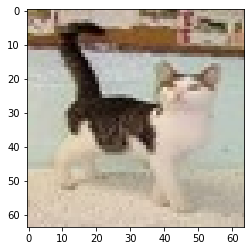

In [71]:
print('y_new = ', y_new[0])
print('y_new1 = ', y_new1[0])
plt.imshow(X_new[0])

y_new =  1
y_new1 =  1


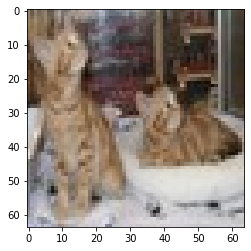

In [70]:
print('y_new = ', y_new[1])
print('y_new1 = ', y_new1[1])
plt.imshow(X_new[1])

y_new =  0
y_new1 =  0


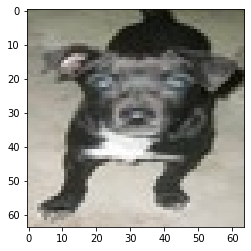

In [72]:
print('y_new = ', y_new[2])
print('y_new1 = ', y_new1[2])
plt.imshow(X_new[2])